# Minimum Region in Galactic Plane to cover at High Cadence

Not all of the science cases proposed in the White Papers required high cadence observations.  The goal of some is to conduct a wide area survey down to the confusion limit, for example.  

So what areas of the Galactic Plane require high cadence at a minimum?

For the purposes of this investigation, high cadence is defined as science that requires observation intervals shorter than 3days. 
From those science cases considered for the Galactic Plane Survey science maps, the science that absolutely requires high cadence is:
* Galactic Bulge (microlensing)
* Magellanic Clouds (microlensing)
* Bonito Star Forming Regions (variability in young stars)

While other science cases certainly require time-domain data, the phenomena they are exploring don't necessarily require high cadence.  E.g. the study of periodic variables can be performed provided a sufficient number of visits is acquired over the lifetime of the survey.  Similarly, a census of Star Forming Regions can also be performed provided the confusion limit is reached in the co-added images in all filters.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from os import path, mkdir
from sys import argv, exit
from astropy import units as u
from astropy.coordinates import Galactic, TETE, SkyCoord
from astropy.io import fits
from astropy.table import Table, Column
from pylab import cm

The regions of interest to each science case are available from the Galactic Science priority maps.  Throughout we use the following configuration of the HEALpixel resolution:

In [2]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
PIXAREA = hp.nside2pixarea(NSIDE,degrees=True)

In [3]:
def load_data_table(file_path):
    hdul = fits.open(file_path)
    table_data = hdul[1].data

    table_data = []
    for data_column in hdul[1].columns:
        table_data.append(Column(data=hdul[1].data[data_column.name],
                                 name=data_column.name))

    return Table(table_data)

In [4]:
file_path = '/Users/rstreet1/software/LSST-TVS_software_tools/footprint_maps/priority_GalPlane_footprint_map_data_sum.fits'
science_footprints = load_data_table(file_path)
print(science_footprints)
print(science_footprints.colnames)

 combined_map galactic_plane_map magellenic_clouds_map ... pencilbeams_map xray_binaries_map k2_fields_map
------------- ------------------ --------------------- ... --------------- ----------------- -------------
0.00034488636                0.0                   0.0 ...             0.0     0.00022996242           0.0
0.00032566104                0.0                   0.0 ...             0.0     0.00021880762           0.0
0.00033408822                0.0                   0.0 ...             0.0     0.00022229564           0.0
0.00034493243                0.0                   0.0 ...             0.0     0.00023046027           0.0
0.00035033762                0.0                   0.0 ...             0.0     0.00023515645           0.0
 0.0003310478                0.0                   0.0 ...             0.0     0.00022407816           0.0
0.00032973572                0.0                   0.0 ...             0.0     0.00021975578           0.0
0.00030806163                0.0     

In [5]:
include_maps = ['galactic_bulge_map', 'magellenic_clouds_map', 'bonito_sfr_map']

combined_region = np.zeros(NPIX)
for science_map in include_maps:
    idx = np.where(science_footprints[science_map] > 0.0)[0]
    combined_region[idx] = 1.0

npixels = len(np.where(combined_region > 0.0)[0])
total_area = npixels * PIXAREA
print('Area of combined survey region = '+str(round(total_area,2))+'sq deg.')

Area of combined survey region = 182.13sq deg.


0.0 180.0 -180.0 180.0


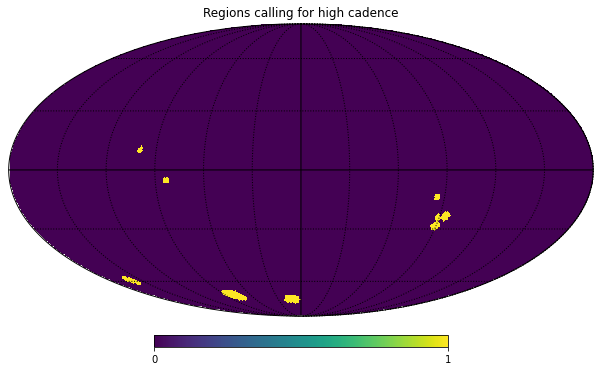

In [7]:
map_title = 'Regions calling for high cadence'
hp.mollview(combined_region, title=map_title)
hp.graticule()